In [1]:
# Install ChEMBL API client if not already installed
! pip install chembl_webresource_client pandas scikit-learn seaborn tensorflow torch rdkit

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from chembl_webresource_client.new_client import new_client
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from rdkit import Chem
from rdkit.Chem import Descriptors


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.8/27.8 MB 43.8 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# Define the target (e.g., lipid nanoparticle delivery or cell receptor)
target = new_client.target
target_query = target.search('lipid nanoparticle')  # Modify based on specific drug delivery target
targets_df = pd.DataFrame.from_dict(target_query)
targets_df.head()


,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],None,Lipid bilayer,15.0,False,CHEMBL4651323,[],LIPID,NaN
1,[],Homo sapiens,Phospholipid transfer protein,13.0,False,CHEMBL5962,"[{'accession': 'P55058', 'component_descriptio...",SINGLE PROTEIN,9606.0
2,[],Pseudomonas aeruginosa (strain ATCC 15692 / PA...,Glycosyltransferase WbpZ,13.0,False,CHEMBL2390815,"[{'accession': 'Q9HTC0', 'component_descriptio...",SINGLE PROTEIN,208964.0
3,[],Homo sapiens,"Acylglycerol kinase, mitochondrial",13.0,False,CHEMBL2417354,"[{'accession': 'Q53H12', 'component_descriptio...",SINGLE PROTEIN,9606.0
4,[],Homo sapiens,Cholesteryl ester transfer protein,12.0,False,CHEMBL3572,"[{'accession': 'P11597', 'component_descriptio...",SINGLE PROTEIN,9606.0


In [3]:
# Select a specific target
selected_target = targets_df.target_chembl_id[0]  # Pick the first target

# Retrieve bioactivity data for selected target
activity = new_client.activity
result = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

# Convert to DataFrame
df = pd.DataFrame.from_dict(result)
df.to_csv("bioactivity_data.csv", index=False)  # Save raw data
df.head()


""


In [8]:
from chembl_webresource_client.new_client import new_client

# Define the target search query
target = new_client.target
target_query = target.search("lipid nanoparticle")  # Modify based on specific drug delivery target

# Convert to DataFrame
targets_df = pd.DataFrame.from_dict(target_query)

# Print results
print("Targets DataFrame shape:", targets_df.shape)
print(targets_df.head())


Targets DataFrame shape: (186, 9)
  cross_references                                           organism  \
0               []                                               None   
1               []                                       Homo sapiens   
2               []  Pseudomonas aeruginosa (strain ATCC 15692 / PA...   
3               []                                       Homo sapiens   
4               []                                       Homo sapiens   

                            pref_name  score  species_group_flag  \
0                       Lipid bilayer   15.0               False   
1       Phospholipid transfer protein   13.0               False   
2            Glycosyltransferase WbpZ   13.0               False   
3  Acylglycerol kinase, mitochondrial   13.0               False   
4  Cholesteryl ester transfer protein   12.0               False   

  target_chembl_id                                  target_components  \
0    CHEMBL4651323                           

In [9]:
# Step 1: Define target search and retrieve results
from chembl_webresource_client.new_client import new_client
import pandas as pd

# Search for relevant targets
target = new_client.target
target_query = target.search("lipid nanoparticle")  # Modify search term if needed
targets_df = pd.DataFrame.from_dict(target_query)

# Print available targets
print("Targets DataFrame shape:", targets_df.shape)
print(targets_df.head())

# Step 2: Select a valid target (Manually choose based on results)
selected_target = "CHEMBL5962"  # Phospholipid Transfer Protein (Modify as needed)
print("Selected Target:", selected_target)

# Step 3: Retrieve bioactivity data for the selected target
activity = new_client.activity
result = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

# Convert to DataFrame
df = pd.DataFrame.from_dict(result)
print("Bioactivity Data Shape:", df.shape)

# Save raw data
df.to_csv("bioactivity_data.csv", index=False)
df.head()



Targets DataFrame shape: (186, 9)
  cross_references                                           organism  \
0               []                                               None   
1               []                                       Homo sapiens   
2               []  Pseudomonas aeruginosa (strain ATCC 15692 / PA...   
3               []                                       Homo sapiens   
4               []                                       Homo sapiens   

                            pref_name  score  species_group_flag  \
0                       Lipid bilayer   15.0               False   
1       Phospholipid transfer protein   13.0               False   
2            Glycosyltransferase WbpZ   13.0               False   
3  Acylglycerol kinase, mitochondrial   13.0               False   
4  Cholesteryl ester transfer protein   12.0               False   

  target_chembl_id                                  target_components  \
0    CHEMBL4651323                           

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,3425190,[],CHEMBL1228381,Inhibition of PLTP,B,None,None,BAO_0000190,...,Homo sapiens,Phospholipid transfer protein,9606,None,None,IC50,uM,UO_0000065,None,32.0
1,None,None,3425191,[],CHEMBL1228381,Inhibition of PLTP,B,None,None,BAO_0000190,...,Homo sapiens,Phospholipid transfer protein,9606,None,None,IC50,uM,UO_0000065,None,100.0
2,None,None,3425192,[],CHEMBL1228381,Inhibition of PLTP,B,None,None,BAO_0000190,...,Homo sapiens,Phospholipid transfer protein,9606,None,None,IC50,uM,UO_0000065,None,60.0
3,None,Not Active,3425193,[],CHEMBL1228381,Inhibition of PLTP,B,None,None,BAO_0000190,...,Homo sapiens,Phospholipid transfer protein,9606,None,None,IC50,None,None,None,None
4,None,Not Active,3425194,[],CHEMBL1228381,Inhibition of PLTP,B,None,None,BAO_0000190,...,Homo sapiens,Phospholipid transfer protein,9606,None,None,IC50,None,None,None,None


In [10]:
# Drop missing values
if 'standard_value' in df.columns and 'canonical_smiles' in df.columns:
    df = df[df['standard_value'].notna()]
    df = df[df['canonical_smiles'].notna()]
else:
    print("Error: 'standard_value' or 'canonical_smiles' column missing!")
    print("Available columns:", df.columns)

# Function to compute molecular descriptors
from rdkit import Chem
from rdkit.Chem import Descriptors

def calculate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return [
            Descriptors.MolWt(mol),  # Molecular Weight
            Descriptors.MolLogP(mol),  # LogP
            Descriptors.NumHDonors(mol),  # Hydrogen Bond Donors
            Descriptors.NumHAcceptors(mol)  # Hydrogen Bond Acceptors
        ]
    else:
        return [None, None, None, None]

# Apply molecular descriptor function
df[['MolWt', 'LogP', 'HDonors', 'HAcceptors']] = df['canonical_smiles'].apply(lambda x: pd.Series(calculate_descriptors(x)))

# Convert IC50 to pIC50 (log scale for better ML performance)
df['pIC50'] = -np.log10(df['standard_value'].astype(float) * 1e-9)

# Drop unnecessary columns
df = df[['MolWt', 'LogP', 'HDonors', 'HAcceptors', 'pIC50']]
df.dropna(inplace=True)

# Save processed data
df.to_csv("processed_data.csv", index=False)
print("Processed data saved successfully!")

df.head()


Processed data saved successfully!


,MolWt,LogP,HDonors,HAcceptors,pIC50
0,419.295,2.4427,5.0,6.0,4.494850
1,445.377,3.6461,1.0,5.0,4.000000
2,405.743,3.9793,2.0,3.0,4.221849
5,507.448,4.6745,1.0,5.0,4.096910
6,465.367,3.7655,4.0,5.0,4.455932


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split data into features (X) and target (y)
X = df.drop(columns=['pIC50'])
y = df['pIC50']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate Model Performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:\nRMSE: {rmse}\nR² Score: {r2}")


Model Performance:
RMSE: 0.3318175430600243
R² Score: 0.07391314169979557


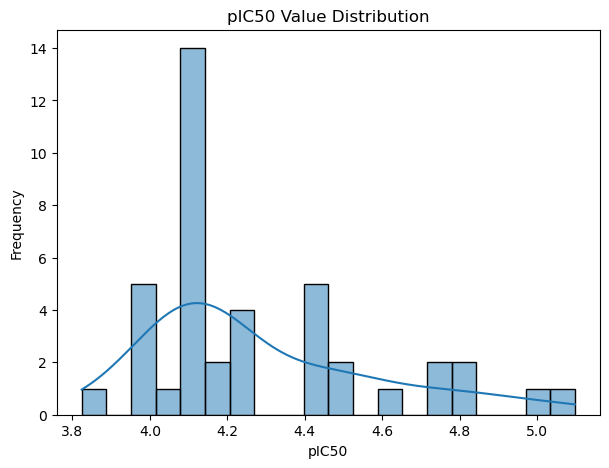

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot pIC50 distribution
plt.figure(figsize=(7, 5))
sns.histplot(df["pIC50"], bins=20, kde=True)
plt.title("pIC50 Value Distribution")
plt.xlabel("pIC50")
plt.ylabel("Frequency")
plt.show()


In [17]:
!pip install scikit-optimize
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args

# Define parameter space for optimization
param_space = [
    Real(100, 800, name='MolWt'),
    Real(-5, 5, name='LogP'),
    Real(0, 5, name='HDonors'),
    Real(0, 10, name='HAcceptors')
]

# Define objective function for optimization
@use_named_args(param_space)
def objective(**params):
    features = np.array([params['MolWt'], params['LogP'], params['HDonors'], params['HAcceptors']]).reshape(1, -1)
    features = scaler.transform(features)
    return -model.predict(features)[0]  # Negative because we minimize

# Run Bayesian Optimization
res = gp_minimize(objective, param_space, n_calls=30, random_state=42)

# Print Best Optimized Drug Properties
print(f"Optimized Drug Properties: {res.x}")



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have v

Optimized Drug Properties: [800.0, -5.0, 5.0, 6.550263493567593]


In [18]:
import torch
import torch.nn as nn
import torch.optim as optim

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X_train, dtype=torch.float32)
y_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

# Define Neural Network Model
class DrugNN(nn.Module):
    def __init__(self):
        super(DrugNN, self).__init__()
        self.fc1 = nn.Linear(4, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Initialize Model
model_nn = DrugNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model_nn.parameters(), lr=0.001)

# Train Neural Network
for epoch in range(100):
    optimizer.zero_grad()
    output = model_nn(X_tensor)
    loss = criterion(output, y_tensor)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")


Epoch 0, Loss: 19.144834518432617
Epoch 10, Loss: 12.779069900512695
Epoch 20, Loss: 6.98299503326416
Epoch 30, Loss: 2.6818625926971436
Epoch 40, Loss: 1.450199007987976
Epoch 50, Loss: 1.1686819791793823
Epoch 60, Loss: 0.8115807771682739
Epoch 70, Loss: 0.67142254114151
Epoch 80, Loss: 0.5414067506790161
Epoch 90, Loss: 0.4493245482444763
